
------- Parameter Check -------
----------- Passed -----------


Regions to be modelled:
- core
- stable_layer

~~~~~ Initial Conditions ~~~~~

time (Myr) = 0.0000e+00

core
-------
ri        = 0.0000e+00
rs        = 3.0000e+05
r_snow    = 3.0000e+05
T_cmb     = 1.8500e+03
conc_l    = 1.0000e-01
mf_l      = 1.6279e-01
M0        = 6.7858e+20
dM        = 0.0000e+00
initial_conc_l= 1.0000e-01
Tcen      = 1.8835e+03
conc_s    = 0.0000e+00
dTm       = -2.5408e+02
c_cmb     = 1.0000e-01
T_upper   = 1.8500e+03

stable_layer
-------
layer_thickness= 0.0000e+00
T_grad_s  = -2.2212e-04
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

iteration: 100    Tcen: 1861.34 ˚K    Q(rs): -0.00 TW    ADR(rs): 0.00    snow depth: 0.00 km    layer thickness: 300.00 km    Q_cmb: 0.00 TW    ADR(rc): 0.46
iteration: 200    Tcen: 1847.91 ˚K    Q(rs): -0.00 TW    ADR(rs): 0.00    snow depth: 0.00 km    layer thickness: 300.00 km    Q_cmb: 0.00 TW    ADR(rc): 0.46
iteration: 300    Tcen: 1835.34 ˚K    Q(rs): -0.00 TW    ADR(rs):

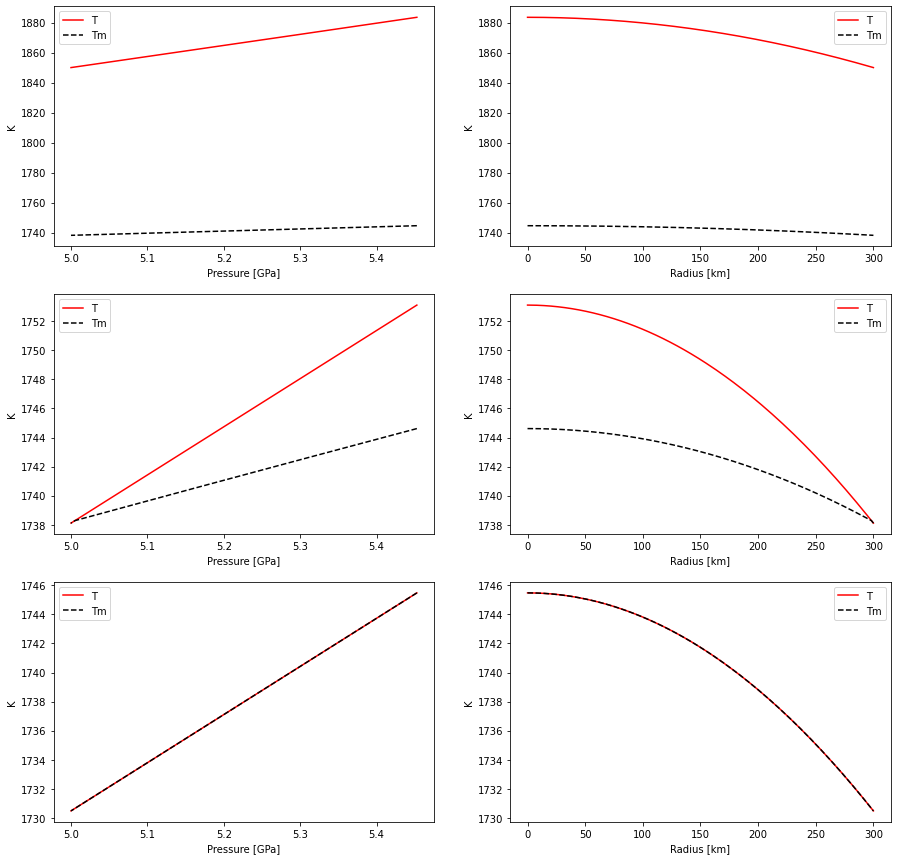


------- Parameter Check -------
----------- Passed -----------


Regions to be modelled:
- core
- stable_layer

~~~~~ Initial Conditions ~~~~~

time (Myr) = 0.0000e+00

core
-------
ri        = 0.0000e+00
rs        = 5.0000e+05
r_snow    = 5.0000e+05
T_cmb     = 1.8500e+03
conc_l    = 1.0000e-01
mf_l      = 1.6279e-01
M0        = 3.1416e+21
dM        = 0.0000e+00
initial_conc_l= 1.0000e-01
Tcen      = 1.9446e+03
conc_s    = 0.0000e+00
dTm       = -2.7391e+02
c_cmb     = 1.0000e-01
T_upper   = 1.8500e+03

stable_layer
-------
layer_thickness= 0.0000e+00
T_grad_s  = -3.7187e-04
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

iteration: 100    Tcen: 1916.73 ˚K    Q(rs): -0.00 TW    ADR(rs): 0.00    snow depth: 0.00 km    layer thickness: 500.00 km    Q_cmb: 0.00 TW    ADR(rc): 0.27
iteration: 200    Tcen: 1896.52 ˚K    Q(rs): -0.00 TW    ADR(rs): 0.00    snow depth: 0.00 km    layer thickness: 500.00 km    Q_cmb: 0.00 TW    ADR(rc): 0.28
iteration: 300    Tcen: 1883.86 ˚K    Q(rs): -0.00 TW    ADR(rs):

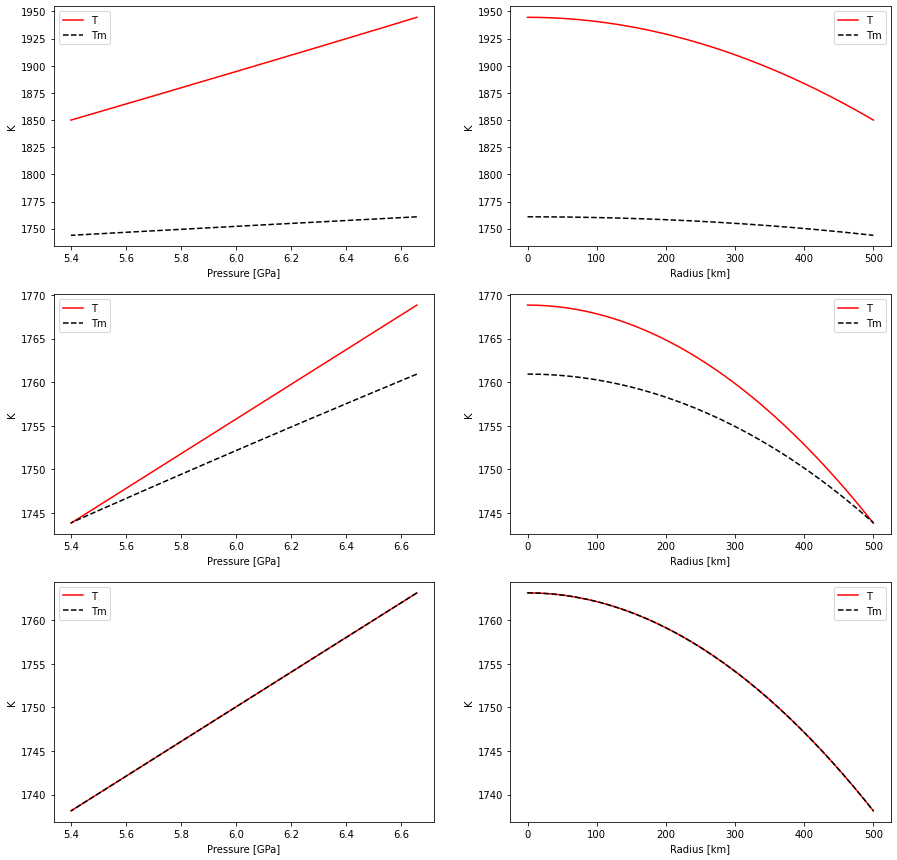


------- Parameter Check -------
----------- Passed -----------


Regions to be modelled:
- core
- stable_layer

~~~~~ Initial Conditions ~~~~~

time (Myr) = 0.0000e+00

core
-------
ri        = 0.0000e+00
rs        = 8.0000e+05
r_snow    = 8.0000e+05
T_cmb     = 1.8500e+03
conc_l    = 1.0000e-01
mf_l      = 1.6279e-01
M0        = 1.2868e+22
dM        = 0.0000e+00
initial_conc_l= 1.0000e-01
Tcen      = 2.1024e+03
conc_s    = 0.0000e+00
dTm       = -3.1657e+02
c_cmb     = 1.0000e-01
T_upper   = 1.8500e+03

stable_layer
-------
layer_thickness= 0.0000e+00
T_grad_s  = -6.0128e-04
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

iteration: 100    Tcen: 2072.54 ˚K    Q(rs): 0.01 TW    ADR(rs): 1.00    snow depth: 0.00 km    layer thickness: 423.67 km    Q_cmb: 0.01 TW    ADR(rc): 0.17
iteration: 200    Tcen: 2041.80 ˚K    Q(rs): 0.00 TW    ADR(rs): 1.00    snow depth: 0.00 km    layer thickness: 729.56 km    Q_cmb: 0.01 TW    ADR(rc): 0.17
iteration: 300    Tcen: 2015.09 ˚K    Q(rs): -0.00 TW    ADR(rs): 0

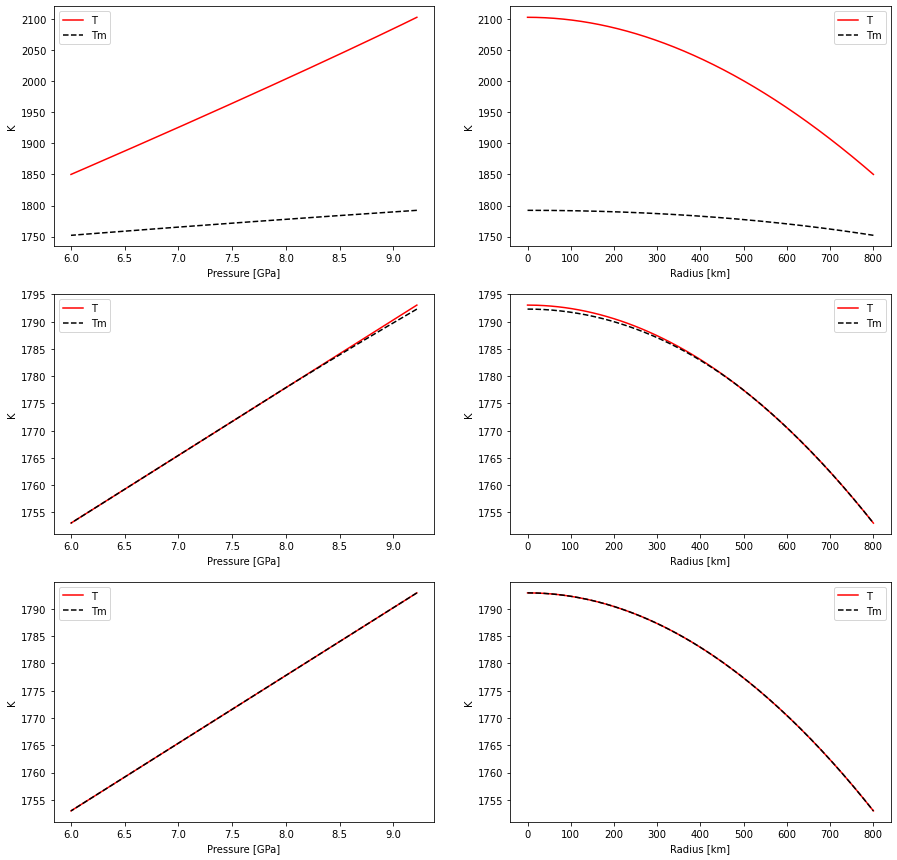

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import thermal_history as th
from thermal_history.core_models.leeds.routines import rivoldini_eos as eos

output = []

for size in [300,500,800]:
    plt.figure(figsize=(15,15))
    plt.title(f'rc = {size} km')
    #Load parameters
    prm = th.model.Parameters((f'../{size}km/{size}_params.py',))
    prm.T_cmb = 1850
    prm.core_cp_params[0] = eos.liquidCore(prm.conc_l[0], prm.P_cmb/1e9, prm.T_cmb)['Cp']
    model = th.model.setup_model(prm, core_method='leeds', stable_layer_method='leeds_thermal')

    prof = model.core.profiles
    r = prof['r']/1000
    P = prof['P']/1e9
    T = prof['T']
    Tm = prof['Tm']

    plt.subplot(3,2,1)
    plt.plot(P, T, 'r-', label='T')
    plt.plot(P, Tm, 'k--', label='Tm')
    plt.legend(loc=0)
    plt.xlabel('Pressure [GPa]')
    plt.ylabel('K')

    plt.subplot(3,2,2)
    plt.plot(r, T, 'r-', label='T')
    plt.plot(r, Tm, 'k--', label='Tm')
    plt.legend(loc=0)
    plt.xlabel('Radius [km]')
    plt.ylabel('K')

    flag1 = True
    flag2 = True

    dt = 1e5*prm.ys
    for i in range(10000):
        model.mantle.Q_cmb = 1e-3 * 4*np.pi*prm.r_cmb**2

        model.evolve(dt)

        if flag1 and model.core.r_snow < prm.r_cmb:
            prof = model.core.profiles
            r = prof['r']/1000
            P = prof['P']/1e9
            T = prof['T']
            Tm = prof['Tm']

            plt.subplot(3,2,3)
            plt.plot(P, T, 'r-', label='T')
            plt.plot(P, Tm, 'k--', label='Tm')
            plt.legend(loc=0)
            plt.xlabel('Pressure [GPa]')
            plt.ylabel('K')

            plt.subplot(3,2,4)
            plt.plot(r, T, 'r-', label='T')
            plt.plot(r, Tm, 'k--', label='Tm')
            plt.legend(loc=0)
            plt.xlabel('Radius [km]')
            plt.ylabel('K')
            flag1 = False

        if flag2 and model.core.r_snow <= 0:
            prof = model.core.profiles
            r = prof['r']/1000
            P = prof['P']/1e9
            T = prof['T']
            Tm = prof['Tm']

            plt.subplot(3,2,5)
            plt.plot(P, T, 'r-', label='T')
            plt.plot(P, Tm, 'k--', label='Tm')
            plt.legend(loc=0)
            plt.xlabel('Pressure [GPa]')
            plt.ylabel('K')

            plt.subplot(3,2,6)
            plt.plot(r, T, 'r-', label='T')
            plt.plot(r, Tm, 'k--', label='Tm')
            plt.legend(loc=0)
            plt.xlabel('Radius [km]')
            plt.ylabel('K')
            flag2 = False
            break
    plt.show()
    output.append(model)

/nfs/see-fs-01_users/earsgre/miniconda3/envs/thermal_history/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
/nfs/see-fs-01_users/earsgre/miniconda3/envs/thermal_history/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
/nfs/see-fs-01_users/earsgre/miniconda3/envs/thermal_history/lib/python3.10/site-packages/numpy/core/fromnumeric.py:

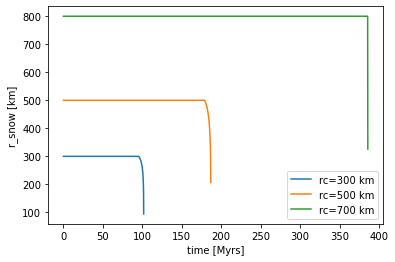

In [62]:
for i,m in enumerate(output):

    data = m.save_dict_to_numpy_array()

    time = data['core']['time']/(1e6*prm.ys)

    r_snow = data['core']['r_snow']/1000

    plt.plot(time, r_snow, label=f'rc={300+(i*200)} km')

plt.xlabel('time [Myrs]')
plt.ylabel('r_snow [km]')
plt.legend(loc=0)
plt.show()